# **Clustering Kadar Polusi Udara dengan Algortima K-Means**
# Clustering with Python 

* Clustering merupakan sebuah teknik yang digunakan untuk menemukan sub-kelompok atau kluster. Prinsip dari clustering adalah data-data yang termasuk dalam kluster yang sama “diharapkan” memiliki kesamaan satu dengan yang lainnya, sedangkan data-data yang ada dalam kluster yang berbeda cukup berbeda dari satu kluster dengan cluster yang lainnya.

* Meskipun tanpa label, clustering memanfaatkan “karakter/pola” pada data bahwa data yang “mirip” akan berdekatan, seperti pada gambar di samping.

<div align="center">
<img src="https://miro.medium.com/max/1280/1*WkU1q0Cuha2QKU5JnkcZBw.gif" width=50%/>
</div>

# **1. Data Preparation**

* Namun, tujuan kita tidak akan membuat sebuah sistem rekomendasi, melainkan segmentasi kadar polusi udara. Segmentasi kadar polusi udara adalah proses membagi kadar polusi di udara berdasarkan karakteristik umum, seperti kadar polusi dari setiap zat kimia diudara, sehingga dapat dilakukan secara lebih efektif.

> Beberapa keuntungan dari segmentasi kadar polusi udara seperti:
* membuat sosialisasi yang terkustomisasi
* menentukan fitur apa yang bisa dirilis untuk informasi tertentu
* membuat prioritas wilayah dalam monitoring polusi udara
* menentukan kadar polusi udara sesuai dengan segmen wilayah
dan lainnya

## **1.1 Import library dan datasheet yang digunakan**


In [ ]:
import numpy as np  # Library untuk komputasi matriks dan aljabar
import matplotlib.pyplot as plt # Library untuk visualisasi data 
import pandas as pd   # Library untuk dataframe 
import seaborn as sns # Library untuk visualisasi data

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline     
sns.set(color_codes=True)
sns.set_theme(style="whitegrid")
plt.style.use('bmh')

## Datasheet Polusi Udara 


> **Insights**

* Data yang digunakan merupakan data yang diperoleh dari hasil observasi polusi udara yang dilakukan dijalan lingkar selatan kota cilegon 

In [ ]:
# download datasheet yang digunakan 
!wget "https://raw.githubusercontent.com/myprojectalan/Datasheet/master/20220820T040431Z.alfirizkinau.Hasil_penelitian.xK3k3NWm.csv"

--2022-09-13 23:05:14--  https://raw.githubusercontent.com/myprojectalan/Datasheet/master/20220820T040431Z.alfirizkinau.Hasil_penelitian.xK3k3NWm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26283 (26K) [text/plain]
Saving to: ‘20220820T040431Z.alfirizkinau.Hasil_penelitian.xK3k3NWm.csv.2’

20220820T040431Z.al 100%[===================>]  25.67K  --.-KB/s    in 0s      

2022-09-13 23:05:14 (82.8 MB/s) - ‘20220820T040431Z.alfirizkinau.Hasil_penelitian.xK3k3NWm.csv.2’ saved [26283/26283]



In [ ]:
# load datasheet 
data = pd.read_csv("/content/20220820T040431Z.alfirizkinau.Hasil_penelitian.xK3k3NWm.csv")

#tampilkan 10 data teratas dan terakhir
data.head(10)

,Co,Co2,Humi,NH4,Temp
0,3.74,2.74,70.9,4.18,30.8
1,3.65,2.69,70.9,4.13,30.8
2,3.61,2.67,70.9,4.10,30.8
3,3.82,2.78,70.9,4.24,30.8
4,3.73,2.73,70.9,4.18,30.9
5,4.29,3.03,71.7,4.56,30.9
6,4.29,3.03,71.7,4.56,30.9
7,3.13,2.41,70.7,3.74,30.9
8,3.13,2.41,70.7,3.74,30.9
9,2.91,2.28,70.5,3.57,30.9


> **Insights:**

* Pada data polusi udara, terdapat 5 fitur yang merepresentasikan informasi tentang Polusi Udara, seperti Co, Co2, dan lainnya.

* Dari informasi di atas, terlihat bahwa hampir semua fitur yang ada pada `data` memiliki proporsi nilai yang jauh antara fitur lain nya sehingga harus dilakukan preprocesing agar nilai setiap fitur nya berimbang. 


## **1.2 Melihat Informasi pada datasheet**
sebelum dilakukan tahap eksplorasi data kita perlu mengetahui informasi data yang digunakan sudah dalam keadaan baik atau belum 

In [ ]:
# menampilkan informasi pada datasheet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Co      938 non-null    float64
 1   Co2     938 non-null    float64
 2   Humi    938 non-null    float64
 3   NH4     938 non-null    float64
 4   Temp    938 non-null    float64
dtypes: float64(5)
memory usage: 36.8 KB


> **Insights:**

* Pada data polusi udara, terdapat 5 fitur yang merepresentasikan informasi tentang Polusi Udara, seperti Co, Co2, dan lainnya.

* Dari informasi di atas, terlihat bahwa hampir semua fitur yang ada pada `data` tidak memiliki _missing values_. 

* Sayangnya, tidak ada data dictionary yang tersedia, sehingga kita sedikit kesulitan mengartikan masing-masing fitur.

* Untuk mengetahui representasi masing-masing fitur, kita perlu melihat nilai-nilai yang ada di masing-masing fitur tersebut

In [ ]:
# melihat jumlah kolom dan baris pada dataframe '
print("Jumlah baris pada dataframe tersebut adalah : ", data.shape[0], "Baris")
print("Jumlah kolom pada dataframe tersebut adalah : ", data.shape[1], "Kolom")
print(" ")

#melihat tipe data pada datasheet
data.dtypes

Jumlah baris pada dataframe tersebut adalah :  938 Baris
Jumlah kolom pada dataframe tersebut adalah :  5 Kolom
 


Co      float64
Co2     float64
Humi    float64
NH4     float64
Temp    float64
dtype: object

# **2. Exploratory Data Analysis (EDA)**
Karena terdapat 5  yang saling melengkapi satu sama lain, kita akan melakukan eksplorasi untuk kelima data tersebut.

* Khusus untuk eksplorasi pada **data Polusi Udara**, kita akan visualisasi  terlebih dahulu, sehingga setiap baris pada data polusi udara akan terdiri dari visualisasi fitur-fitur dari Kadar gas Co, Kadat gas Co2, dan Kadar gas NH4 dan lain-lainnya.

> Langkah-langkah yang akan kita lakukan untuk EDA adalah sebagai berikut:
* Eksplor data untuk fitur Co, seperti jumlah (unik) kadar Co yang tersedia, pola yang tersedia dan lainnya
* Eksplor data untuk fitur Co2, seperti rentang kadar Co2 di udara, korelasi dengan kadar polusi udara dan lainnya

Pertama-tama, kita akan coba eksplor data artikel terlebih dahulu.

## **2.1 Deteksi missing value**
pada bagian ini dilakukan pembersihan nilai missing value pada setiap fitur kolom pada datasheet

In [ ]:
data[data.isna().all(axis=1)]

,Co,Co2,Humi,NH4,Temp




> **Insights:**
dari data diatas, terlihat bahwa tidak ada baris yang semua fitur nya kosong



## **2.2 Hapus data untuk kolom Humi dan Temp**

In [ ]:
data.drop(columns=["Humi", "Temp"], inplace=True)
data.head()

,Co,Co2,NH4
0,3.74,2.74,4.18
1,3.65,2.69,4.13
2,3.61,2.67,4.10
3,3.82,2.78,4.24
4,3.73,2.73,4.18


> **Insights:**
* pada kolom fitur Humidity dan Temperature dilakukan konversi tipe data agar rentang nilai pada antar fitur tidak terlalu jauh 
* dan agar dapat sedikit menghilangkan data yang mengalami nilai outlier 



## **2.3 Deteksi Nilai Outlier**

In [ ]:
def detect_outliers(data, x):
    Q1 = data[x].describe()['25%']
    Q3 = data[x].describe()['75%']
    IQR = Q3-Q1
    return data[(data[x] < Q1-1.5*IQR) | (data[x] > Q3+1.5*IQR)]

### **2.1.1 Deteksi nilai outlier Kolom Gas Co (Carbon Monoksida)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


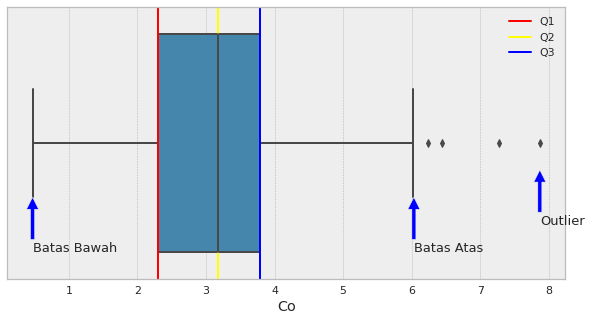

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(data['Co'])
plt.axvline(data['Co'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['Co'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['Co'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['Co'].describe()['max'],0.1), xytext = (data['Co'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

IQR = data['Co'].describe()['75%'] - data['Co'].describe()['25%']
plt.annotate('Batas Atas', (data['Co'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['Co'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

plt.annotate('Batas Bawah', (data['Co'].describe()['min'], 0.2), 
             xytext = (data['Co'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()



> **Insights:**
* pada kolom fitur kadar Co mengalami nilai outlier sehingga perlu dilakukan perhitungan nilai IQR untuk menghilangkan nilai outlier

#### **A.) Menghapus nilai Outlier Kolom Co**

In [ ]:
detect_outliers(data,'Co')

,Co,Co2,Humi,NH4,Temp
88,6.44,4.07,70.4,5.89,31.1
352,6.24,3.97,74.5,5.77,30.5
721,7.27,4.44,56.0,6.36,33.9
819,7.87,4.70,69.2,6.68,31.3


> **Insights:**
* dari hasil deteksi yang kita lakukan terdapat 4 nilai yang mengalami outlier sehingga kita perlu melakukan preprocesing untuk data tersebut



pada tahapan ini dilakukan perhitungan nilai IQR pada fitur kolom data Co

In [ ]:
# nilai outlier untuk fitur SystolicBP 
Q1 = data['Co'].quantile(0.25)
Q3 = data['Co'].quantile(0.75)

# isi nilai yang diluar ambang batas dengan teknik mean 
data['Co'].fillna(data['Co'].value_counts().idxmax(), inplace =True)

IQR = Q3 - Q1
print("Nilai IQR dari Datasheet tersebut adalah :", IQR)
print('')

# preprocesing missing outliers
data = data[~((data['Co'] < (Q1 - 1.5 * IQR )) | (data['Co'] > (Q3 + 1.5 * IQR)))]

Nilai IQR dari Datasheet tersebut adalah : 1.495



setelah dilakukan perhitungan IQR kita cek dengan visualisasi boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


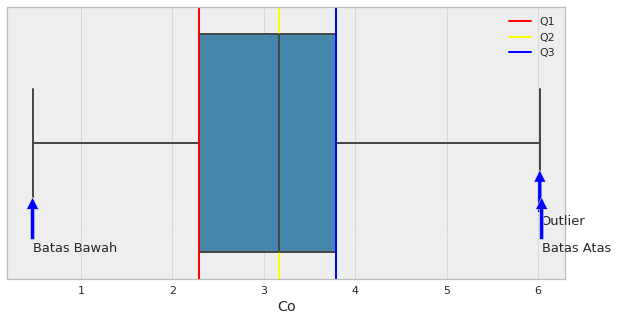

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(data['Co'])
plt.axvline(data['Co'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['Co'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['Co'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['Co'].describe()['max'],0.1), xytext = (data['Co'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

IQR = data['Co'].describe()['75%'] - data['Co'].describe()['25%']
plt.annotate('Batas Atas', (data['Co'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['Co'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

plt.annotate('Batas Bawah', (data['Co'].describe()['min'], 0.2), 
             xytext = (data['Co'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

> **Insights:**
* pada visualisasi diatas kolom Co tidak lagi mengalami nilai yang outlier 




### **2.1.2 Deteksi nilai outlier Kolom Co2**
pada bagian ini dilakukan pembersihan nilai outlier pada setiap fitur kolom pada datasheet

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


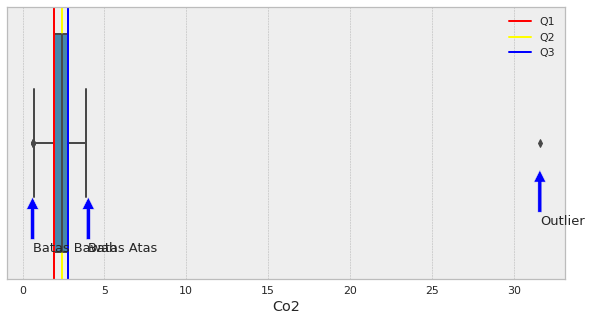

In [ ]:
# Deteksi nilai outlier pada kolom Co2
plt.figure(figsize = (10, 5))
sns.boxplot(data['Co2'])
plt.axvline(data['Co2'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['Co2'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['Co2'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['Co2'].describe()['max'],0.1), xytext = (data['Co2'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

IQR = data['Co2'].describe()['75%'] - data['Co2'].describe()['25%']
plt.annotate('Batas Atas', (data['Co2'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['Co2'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

plt.annotate('Batas Bawah', (data['Co2'].describe()['min'], 0.2), 
             xytext = (data['Co2'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

> **Insights:**
* pada visualisasi diatas kolom Co2 mengalami nilai yang outlier sehingga perlu kita proses 




#### A.) **Menghapus nilai outlier pada kolom Co2**
terlihat pada kolom fitur Co2 mengalami nilai outlier yang jauh sehingga harus kita normalisasikan dengan perhitungan IQR

In [ ]:
detect_outliers(data,'Co2')

,Co,Co2,Humi,NH4,Temp
54,0.53,0.66,69.3,1.22,31.30
55,0.53,0.66,69.3,1.22,31.30
56,0.51,0.64,69.6,1.20,31.20
57,0.51,0.64,69.6,1.20,31.20
66,0.47,0.61,69.4,1.14,31.30
67,0.47,0.61,69.4,1.14,31.30
249,1.97,31.60,3.0,1.00,1.14
782,0.52,0.65,53.1,1.21,35.10


> **Insights:**
* pada Tabel diatas kolom Co2 data yang mengalami nilai yang outlier terdapat 5 data sehingga kelima data tersebut harus diproses 




In [ ]:
# nilai outlier untuk fitur Co2
Q1 = data['Co2'].quantile(0.25)
Q3 = data['Co2'].quantile(0.75)

# isi nilai yang diluar ambang batas dengan teknik mean 
data['Co2'].fillna(data['Co2'].value_counts().idxmax(), inplace =True)

IQR = Q3 - Q1
print("Nilai IQR dari Datasheet tersebut adalah :", IQR)
print('')

# preprocesing missing outliers
data = data[~((data['Co2'] < (Q1 - 1.5 * IQR )) | (data['Co2'] > (Q3 + 1.5 * IQR)))]

Nilai IQR dari Datasheet tersebut adalah : 0.8374999999999999



setelah dilakukan perhitungan nilai IQR kita coba visualisasikan dengan boxplot apakah ada nilai nya sudah normal

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


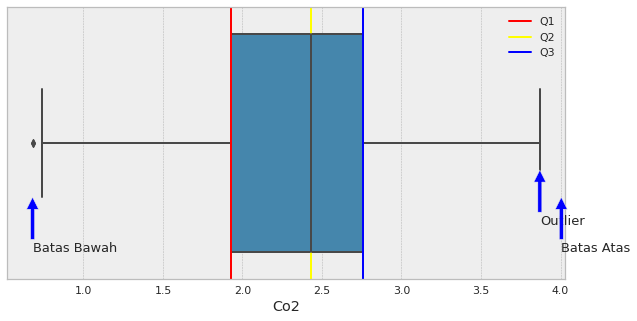

In [ ]:
# Deteksi nilai outlier pada kolom Co2
plt.figure(figsize = (10, 5))
sns.boxplot(data['Co2'])
plt.axvline(data['Co2'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['Co2'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['Co2'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['Co2'].describe()['max'],0.1), xytext = (data['Co2'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

IQR = data['Co2'].describe()['75%'] - data['Co2'].describe()['25%']
plt.annotate('Batas Atas', (data['Co2'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['Co2'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

plt.annotate('Batas Bawah', (data['Co2'].describe()['min'], 0.2), 
             xytext = (data['Co2'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

> **Insights:**
* pada visualisasi diatas kolom Co2 tidak lagi mengalami nilai yang outlier 




### **2.1.5 Deteksi nilai outlier kolom NH4**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


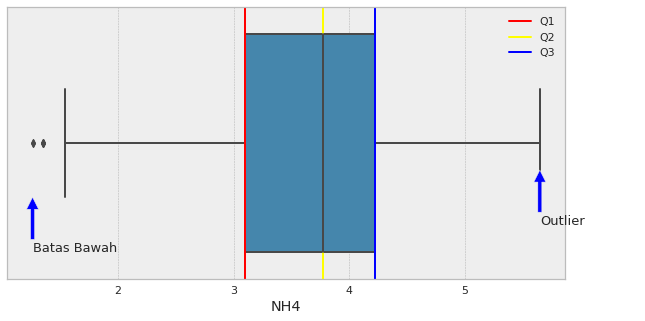

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(data['NH4'])
plt.axvline(data['NH4'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['NH4'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['NH4'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['NH4'].describe()['max'],0.1), xytext = (data['NH4'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

IQR = data['NH4'].describe()['75%'] - data['NH4'].describe()['25%']
plt.annotate('Batas Atas', (data['NH4'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['NH4'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

plt.annotate('Batas Bawah', (data['NH4'].describe()['min'], 0.2), 
             xytext = (data['NH4'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

> **Insights:**
* pada visualisasi diatas kolom NH4  mengalami nilai yang outlier 




#### **A.Deteksi nilai outlier NH4**

In [ ]:
detect_outliers(data, 'NH4')

,Co,Co2,Humi,NH4,Temp
52,0.62,0.74,69.2,1.35,31.4
53,0.62,0.74,69.2,1.35,31.4
64,0.55,0.68,69.3,1.26,31.3
65,0.55,0.68,69.3,1.26,31.3
68,0.62,0.74,69.5,1.35,31.3
69,0.62,0.74,69.5,1.35,31.3


In [ ]:
# nilai outlier untuk fitur Co2
Q1 = data['NH4'].quantile(0.25)
Q3 = data['NH4'].quantile(0.75)

# isi nilai yang diluar ambang batas dengan teknik mean 
data['NH4'].fillna(data['NH4'].value_counts().idxmax(), inplace =True)

IQR = Q3 - Q1
print("Nilai IQR dari Datasheet tersebut adalah :", IQR)
print('')

# preprocesing missing outliers
data = data[~((data['NH4'] < (Q1 - 1.5 * IQR )) | (data['NH4'] > (Q3 + 1.5 * IQR)))]

Nilai IQR dari Datasheet tersebut adalah : 1.1199999999999997



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


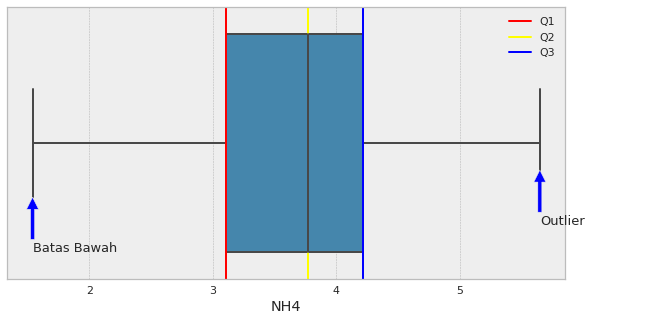

In [ ]:
plt.figure(figsize = (10, 5))
sns.boxplot(data['NH4'])
plt.axvline(data['NH4'].describe()['25%'], color = 'red', label = 'Q1')
plt.axvline(data['NH4'].describe()['50%'], color = 'yellow', label = 'Q2')
plt.axvline(data['NH4'].describe()['75%'], color = 'blue', label = 'Q3')
plt.annotate('Outlier', (data['NH4'].describe()['max'],0.1), xytext = (data['NH4'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

IQR = data['NH4'].describe()['75%'] - data['NH4'].describe()['25%']
plt.annotate('Batas Atas', (data['NH4'].describe()['75%'] + 1.5*IQR, 0.2), 
             xytext = (data['NH4'].describe()['75%'] + 1.5*IQR, 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )

plt.annotate('Batas Bawah', (data['NH4'].describe()['min'], 0.2), 
             xytext = (data['NH4'].describe()['min'], 0.4),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
plt.legend()

> **Insights:**
* pada visualisasi diatas kolom NH4 tidak lagi mengalami nilai yang outlier 




In [ ]:
# nilai outlier untuk fitur Co2
Q1 = data['Temp'].quantile(0.25)
Q3 = data['Temp'].quantile(0.75)

# isi nilai yang diluar ambang batas dengan teknik mean 
data['Temp'].fillna(data['Temp'].value_counts().idxmax(), inplace =True)

IQR = Q3 - Q1
print("Nilai IQR dari Datasheet tersebut adalah :", IQR)
print('')

# preprocesing missing outliers
data = data[~((data['Temp'] < (Q1 - 1.5 * IQR )) | (data['Temp'] > (Q3 + 1.5 * IQR)))]

Nilai IQR dari Datasheet tersebut adalah : 0.6999999999999993



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


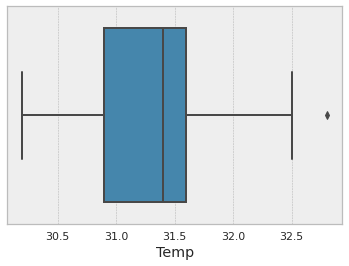

In [ ]:
sns.boxplot(data['Temp'])

In [ ]:
# nilai outlier untuk fitur Co2
Q1 = data['Humi'].quantile(0.25)
Q3 = data['Humi'].quantile(0.75)

# isi nilai yang diluar ambang batas dengan teknik mean 
data['Humi'].fillna(data['Humi'].value_counts().idxmax(), inplace =True)

IQR = Q3 - Q1
print("Nilai IQR dari Datasheet tersebut adalah :", IQR)
print('')

# preprocesing missing outliers
data = data[~((data['Humi'] < (Q1 - 1.5 * IQR )) | (data['Humi'] > (Q3 + 1.5 * IQR)))]

Nilai IQR dari Datasheet tersebut adalah : 5.900000000000006



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


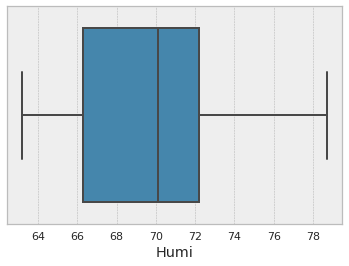

In [ ]:
sns.boxplot(data['Humi'])

,Co,Co2,Humi,NH4,Temp
Co,1.000000,0.997744,-0.144957,0.995854,0.228111
Co2,0.997744,1.000000,-0.145057,0.999688,0.229565
Humi,-0.144957,-0.145057,1.000000,-0.146878,-0.787484
NH4,0.995854,0.999688,-0.146878,1.000000,0.231090
Temp,0.228111,0.229565,-0.787484,0.231090,1.000000


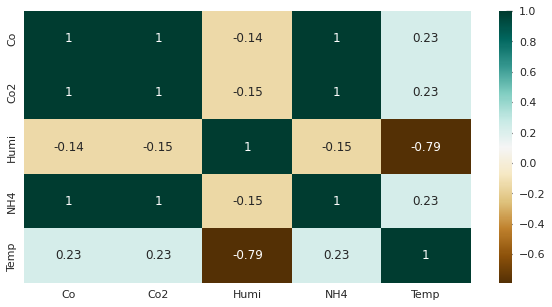

In [ ]:
plt.figure(figsize=(10, 5))
visualisasi = data.corr()
sns.heatmap(visualisasi, cmap="BrBG", annot = True)
visualisasi

In [ ]:
data.describe()

,Co,Co2,Humi,NH4,Temp
count,766.000000,766.000000,766.000000,766.000000,766.000000
mean,3.105013,2.362389,69.563577,3.671671,31.312402
std,1.033806,0.591646,3.778576,0.805534,0.477784
min,0.760000,0.860000,63.200000,1.540000,30.200000
25%,2.420000,2.000000,66.300000,3.190000,30.900000
50%,3.185000,2.435000,70.100000,3.780000,31.400000
75%,3.810000,2.780000,72.200000,4.240000,31.600000
max,6.020000,3.870000,78.700000,5.650000,32.500000


In [ ]:
X = data.iloc[:, 0:5]
y = data.iloc[:, 1:]
y

,Co2,Humi,NH4,Temp
0,2.74,70.9,4.18,30.8
1,2.69,70.9,4.13,30.8
2,2.67,70.9,4.10,30.8
3,2.78,70.9,4.24,30.8
4,2.73,70.9,4.18,30.9
...,...,...,...,...
933,2.63,67.5,4.05,32.0
934,2.70,67.3,4.13,32.0
935,2.70,67.3,4.13,32.0
936,2.76,67.5,4.22,32.0


Text(0, 0.5, 'Seconds principial components')

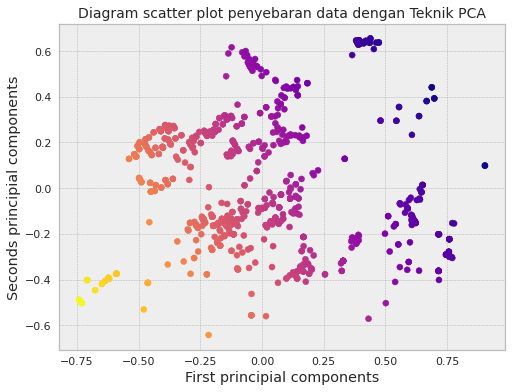

In [ ]:
# import library 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# scaling datasheet dengan pandas
X = data.iloc[:, 0:5]
y = data.iloc[:, 1:]

# transformasi data dengan standard scaler
scaler = MinMaxScaler()
scaler = scaler.fit_transform(data)

# transformasikan ke dalam bentuk PCA
pca = PCA(n_components=2)
pca.fit(scaler)
x_pca = pca.transform(scaler)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c = data['Co'], cmap='plasma')
plt.title('Diagram scatter plot penyebaran data dengan Teknik PCA',
          fontsize = 14)
plt.xlabel('First principial components')
plt.ylabel('Seconds principial components')

# download hasil visualisasi
# plt.savefig("Histogram Penyebaran gas carbon.png", quality = 95)

In [ ]:
pca.components_

array([[-0.50247374, -0.50327961,  0.35683381, -0.50195179, -0.33903363],
       [-0.28343152, -0.2835466 , -0.69648376, -0.28132376,  0.52443801]])

# **4. Build Model Klasterisasi Kadar Polusi Udara dengan Algoritma K-Means**
pada bagian ini dilakukan build model klasterisasi kadar polusi udara dengan menggunakan algoritma K-Means

In [ ]:
from pprint import pprint
from time import time
from sklearn.cluster import KMeans, MiniBatchKMeans
from yellowbrick.cluster import SilhouetteVisualizer

## **4.1 Fitting model dengan algoritma K-Means**

In [ ]:
K = 4
mb_kmeans_4 = MiniBatchKMeans(n_clusters=K)

start = time()
mb_kmeans_4.fit(x_pca)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.178s


In [ ]:
X = data.assign(
    clusters_of_5 = mb_kmeans_4.predict(x_pca),
)

with pd.option_context("display.max_columns", None):
    display(X.head())

,Co,Co2,Humi,NH4,Temp,clusters_of_5
0,3.74,2.74,70.9,4.18,30.8,0
1,3.65,2.69,70.9,4.13,30.8,0
2,3.61,2.67,70.9,4.10,30.8,0
3,3.82,2.78,70.9,4.24,30.8,0
4,3.73,2.73,70.9,4.18,30.9,0


## **4.2 Sum of Squared distances**

In [ ]:
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(x_pca)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 0.011s
Clustering with n_clusters=2
Done clustering in 0.028s
Clustering with n_clusters=3
Done clustering in 0.024s
Clustering with n_clusters=4
Done clustering in 0.025s
Clustering with n_clusters=5
Done clustering in 0.029s
Clustering with n_clusters=6
Done clustering in 0.033s
Clustering with n_clusters=7
Done clustering in 0.036s
Clustering with n_clusters=8
Done clustering in 0.039s
Clustering with n_clusters=9
Done clustering in 0.044s
Clustering with n_clusters=10
Done clustering in 0.042s


## **4.3 Visualisasi N_Clusters** 

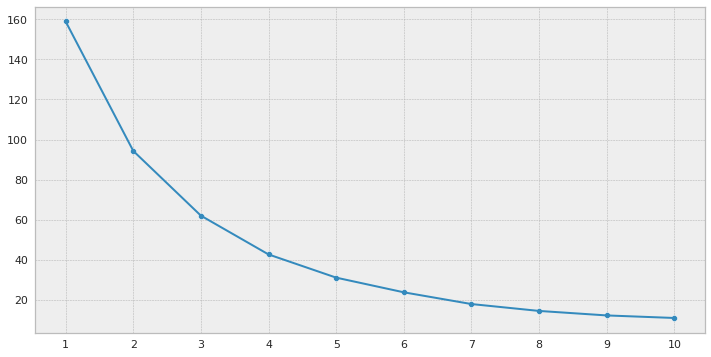

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 11), y=ssd)
sns.scatterplot(x=range(1, 11), y=ssd)
plt.xticks(range(1, 11))
plt.show()

## **4.4 Silhouette Coefficient**

* Koefisien silhouette dihitung menggunakan persamaan:

$$
\frac{b-a}{\max{(a, b)}},
$$

* dengan $a$ adalah jarak **intra-cluster**, yaitu jarak antar elemen dalam satu cluster, dan $a$ adalah jarak **inter-cluster**, yaitu jarak suatu elemen dengan elemen lain yang tidak dalam satu cluster yang sama. 

* Nilai koefisien silhouette berada pada rentang antara -1 sampai 1. Jika koefisien silhouette semakin mendekati 1, maka bisa dikatakan cluster yang dihasilkan sudah optimal.

* Kita bisa menggunakan fungsi `silhouette_score` dari scikit-learn.

In [ ]:
limit = int(len(x_pca)*0.2)
X_scaled_sample = x_pca[0:limit]

In [ ]:
silhouette_scores = []

# INFORMATION
# It may take a longer time to run, the sample data took around 46m 30s to be completed

for k in range(2, 21):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_scaled_sample)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(X_scaled_sample, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 0.027s
Calculating silhouette coefficient..
Done calculating in 0.007s
Clustering with n_clusters=3
Done clustering in 0.017s
Calculating silhouette coefficient..
Done calculating in 0.003s
Clustering with n_clusters=4
Done clustering in 0.026s
Calculating silhouette coefficient..
Done calculating in 0.002s
Clustering with n_clusters=5
Done clustering in 0.031s
Calculating silhouette coefficient..
Done calculating in 0.002s
Clustering with n_clusters=6
Done clustering in 0.129s
Calculating silhouette coefficient..
Done calculating in 0.006s
Clustering with n_clusters=7
Done clustering in 0.039s
Calculating silhouette coefficient..
Done calculating in 0.002s
Clustering with n_clusters=8
Done clustering in 0.045s
Calculating silhouette coefficient..
Done calculating in 0.002s
Clustering with n_clusters=9
Done clustering in 0.129s
Calculating silhouette coefficient..
Done calculating in 0.006s
Clustering with n_clusters=10
Done clustering in

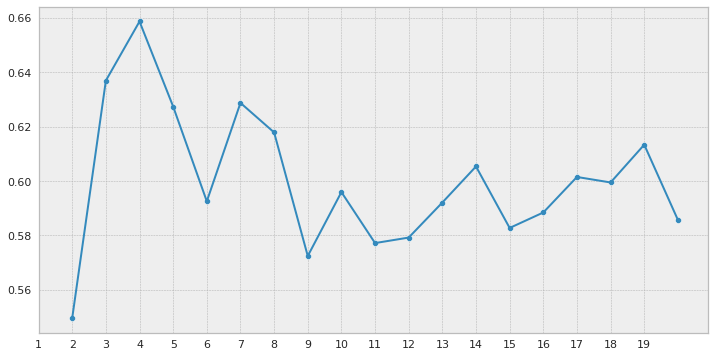

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 21), y=silhouette_scores)
sns.scatterplot(x=range(2, 21), y=silhouette_scores)
plt.xticks(range(1, 20))
plt.show()

## **4.5 Visualisasi Teknik Elbow**

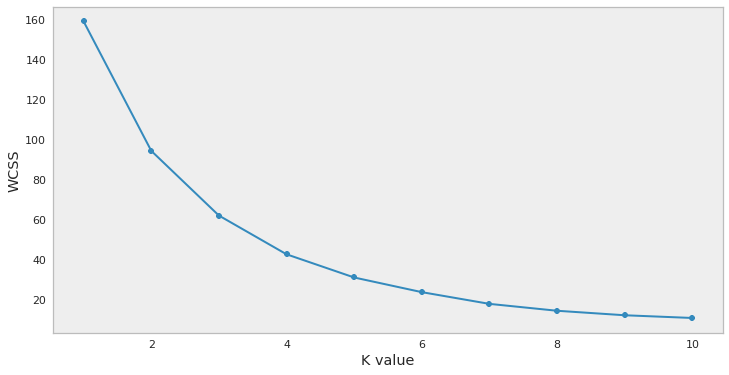

In [ ]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,marker='8')
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

## **4.6 Model Development**

In [ ]:
mc_kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(x_pca)
print(label)

[4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2 4 4 9 9
 9 4 2 2 2 2 9 9 9 9 9 9 9 9 9 9 9 9 9 9 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 4
 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 4 4 4 4 4 4 2 2 2 2 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8 8 8 8 8 8 8 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
 3 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 2 4 4 6 6 6 6 6 4
 4 4 4 6 6 6 6 4 4 4 4 4 

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(x_pca)

print(kmeans.cluster_centers_)
data['K-Means'] = kmeans.labels_
data.head(20)

[[-0.11577905 -0.20980826]
 [ 0.21338812  0.42612874]
 [-0.29131844  0.18743382]
 [ 0.58054247 -0.20893141]]


,Co,Co2,Humi,NH4,Temp,K-Means
0,3.74,2.74,70.9,4.18,30.8,0
1,3.65,2.69,70.9,4.13,30.8,0
2,3.61,2.67,70.9,4.10,30.8,0
3,3.82,2.78,70.9,4.24,30.8,0
4,3.73,2.73,70.9,4.18,30.9,0
5,4.29,3.03,71.7,4.56,30.9,0
6,4.29,3.03,71.7,4.56,30.9,0
7,3.13,2.41,70.7,3.74,30.9,0
8,3.13,2.41,70.7,3.74,30.9,0
9,2.91,2.28,70.5,3.57,30.9,0


### **4.6.1 Visualize Clusters**

Oleh karena jumlah fitur yang sangat banyak, kita tidak bisa membuat visualisasi dalam bentuk 2 dimensi seperti contoh di bawah ini.

<div align="center">
<img src="https://miro.medium.com/max/948/1*XtLZeA1AY99lTFDAshYnmw.png" width=50%/>
</div>

Kita akan coba menggunakan beberapa pasang fitur yang ada menggunakan `pairplot` dari Seaborn.

> Sebagai contoh, kita akan gunakan hasil cluster dengan `K=5` dan menggunakan 20% dari total data karena alasan resource

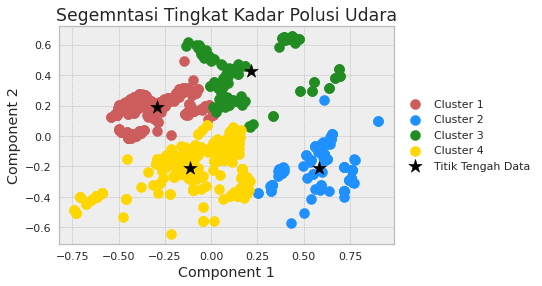

In [ ]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', 
 n_init= 1, random_state=10)
y_kmeans= kmeansmodel.fit_predict(x_pca)

#clusters=kmeans.fit_predict(x_pca)
#data['label']=y_kmeans
#fig=plt.figure(figsize=(10,10))
#ax=fig.add_subplot(111,projection='3d')

plt.scatter(x_pca[y_kmeans == 0, 0], x_pca[y_kmeans == 0, 1], s = 100, c = '#CD5C5C', label = 'Cluster 1')
plt.scatter(x_pca[y_kmeans == 1, 0], x_pca[y_kmeans == 1, 1], s = 100, c = '#1E90FF', label = 'Cluster 2')
plt.scatter(x_pca[y_kmeans == 2, 0], x_pca[y_kmeans == 2, 1], s = 100, c = '#228B22', label = 'Cluster 3')
plt.scatter(x_pca[y_kmeans == 3, 0], x_pca[y_kmeans == 3, 1], s = 100, c = '#FFD700', label = 'Cluster 4')

#ax.view_init(30,185)

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='Black', s=200, alpha=1, marker ="*", label = 'Titik Tengah Data');

plt.title('Segemntasi Tingkat Kadar Polusi Udara')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
#ax.set_zlabel('NH4')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)
#plt.savefig("Segemntasi 3 dimensi.png", quality=95)
#plt.legend()
plt.show()

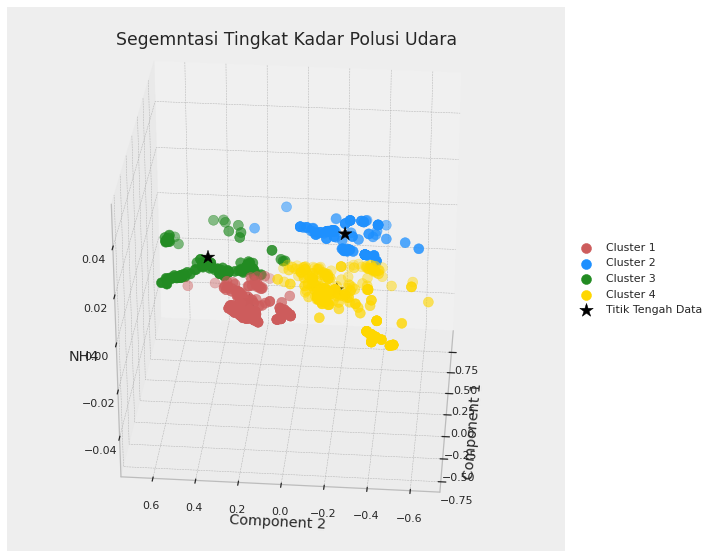

In [ ]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', 
 n_init= 1, random_state=10)
y_kmeans= kmeansmodel.fit_predict(x_pca)

#clusters=kmeans.fit_predict(x_pca)
data['label']=y_kmeans
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')

plt.scatter(x_pca[y_kmeans == 0, 0], x_pca[y_kmeans == 0, 1], s = 100, c = '#CD5C5C', label = 'Cluster 1')
plt.scatter(x_pca[y_kmeans == 1, 0], x_pca[y_kmeans == 1, 1], s = 100, c = '#1E90FF', label = 'Cluster 2')
plt.scatter(x_pca[y_kmeans == 2, 0], x_pca[y_kmeans == 2, 1], s = 100, c = '#228B22', label = 'Cluster 3')
plt.scatter(x_pca[y_kmeans == 3, 0], x_pca[y_kmeans == 3, 1], s = 100, c = '#FFD700', label = 'Cluster 4')

ax.view_init(30,185)

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='Black', s=200, alpha=1, marker ="*", label = 'Titik Tengah Data');

plt.title('Segemntasi Tingkat Kadar Polusi Udara')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
ax.set_zlabel('NH4')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)
plt.savefig("Segemntasi 3 dimensi.png", quality=95)
#plt.legend()
plt.show()

In [ ]:
np.set_printoptions(precision=3, suppress=True)
for iteration in range(1, 20):
    k_means = KMeans(n_clusters = 5, init='random',
                     max_iter=iteration, n_init=1,random_state=101)
    k_means.fit(x_pca)
    print("iteration: %i - 2nd Centroid: %s" % (iteration, k_means.cluster_centers_[4]))

iteration: 1 - 2nd Centroid: [-0.087 -0.204]
iteration: 2 - 2nd Centroid: [-0.058 -0.19 ]
iteration: 3 - 2nd Centroid: [-0.052 -0.186]
iteration: 4 - 2nd Centroid: [-0.051 -0.183]
iteration: 5 - 2nd Centroid: [-0.051 -0.183]
iteration: 6 - 2nd Centroid: [-0.051 -0.182]
iteration: 7 - 2nd Centroid: [-0.051 -0.182]
iteration: 8 - 2nd Centroid: [-0.05  -0.181]
iteration: 9 - 2nd Centroid: [-0.05  -0.181]
iteration: 10 - 2nd Centroid: [-0.049 -0.18 ]
iteration: 11 - 2nd Centroid: [-0.05  -0.181]
iteration: 12 - 2nd Centroid: [-0.05  -0.181]
iteration: 13 - 2nd Centroid: [-0.05  -0.181]
iteration: 14 - 2nd Centroid: [-0.05  -0.181]
iteration: 15 - 2nd Centroid: [-0.05  -0.181]
iteration: 16 - 2nd Centroid: [-0.05  -0.181]
iteration: 17 - 2nd Centroid: [-0.05  -0.181]
iteration: 18 - 2nd Centroid: [-0.05  -0.181]
iteration: 19 - 2nd Centroid: [-0.05  -0.181]


# **Segementasi Polusi Udara dengan Fuzzy C-Means**

In [ ]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2


In [ ]:
from fcmeans import FCM

fcm = FCM(n_clusters = 5, m=2, error=0.005, max_iter=1000)
fcm.fit(x_pca)

fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

print(fcm_centers)
print(fcm_labels)

[[-0.21  -0.179]
 [ 0.088 -0.16 ]
 [ 0.62  -0.168]
 [-0.346  0.183]
 [ 0.122  0.411]]
[0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 2 2
 2 0 1 1 4 4 4 4 4 4 4 4 4 4 2 2 2 2 4 4 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 4
 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1

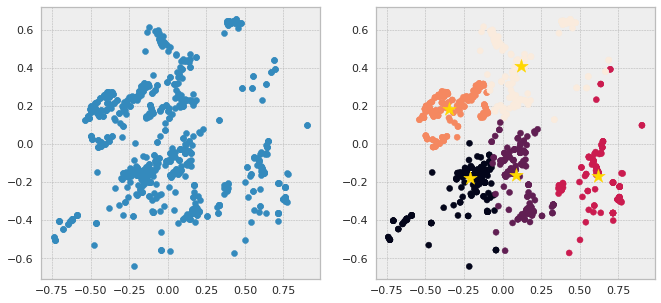

In [ ]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(x_pca[:,0], x_pca[:,1])
axes[1].scatter(x_pca[:,0], x_pca[:,1], c=fcm_labels)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="*", s=200, c='#FFD700')
plt.show()

In [ ]:
print(fcm_centers)
data['C-Means'] = fcm_labels
data.head(20)

[[-0.21  -0.179]
 [ 0.088 -0.16 ]
 [ 0.62  -0.168]
 [-0.346  0.183]
 [ 0.122  0.411]]


,Co,Co2,Humi,NH4,Temp,K-Means,label,C-Means
0,3.74,2.74,70.9,4.18,30.8,0,3,0
1,3.65,2.69,70.9,4.13,30.8,0,3,0
2,3.61,2.67,70.9,4.10,30.8,0,3,1
3,3.82,2.78,70.9,4.24,30.8,0,3,0
4,3.73,2.73,70.9,4.18,30.9,0,3,0
5,4.29,3.03,71.7,4.56,30.9,0,3,0
6,4.29,3.03,71.7,4.56,30.9,0,3,0
7,3.13,2.41,70.7,3.74,30.9,0,3,1
8,3.13,2.41,70.7,3.74,30.9,0,3,1
9,2.91,2.28,70.5,3.57,30.9,0,3,1


In [ ]:
# Akurasi Model pada KMeans
from sklearn.metrics import silhouette_score

score = silhouette_score(x_pca, fcm_labels)
print('Silhouette Score: %.2f' % score)

Silhouette Score: 0.44


# **5 Mount Google Drive**

In [ ]:
#Hubungkan Google Colab ke Google Drive
%cd ..
from google.colab import drive 
drive.mount('content/gdrive')

/
Mounted at content/gdrive


In [ ]:
# simpan hasil Klasterisasi ke dalam format CSV 
print("Export to CSV..")

# refer to point 6
data.to_csv("/content/gdrive/MyDrive/Project/K-means-C-Means.csv", index=True)
print("Done!")

Export to CSV..
Done!
